In [3]:
import spacy
from spacy.cli import download
print(download('en_core_web_lg'))

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
None


In [4]:
nlp = spacy.load("en_core_web_lg")

In [5]:
from newsapi import NewsApiClient
newsapi = NewsApiClient (api_key='Enter_API_KEY_HERE')

In [32]:
def getSomething(x):
    temp = newsapi.get_everything(q='influencers', language='en', 
                                  from_param='2021-09-18', to='2020-10-10', 
                                  sort_by='relevancy', page=x)
    return temp

articles = list(map(getSomething, range(1,6)))

In [33]:
import pandas as pd

In [34]:
dados = []

for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        description = x['description']
        content = x['content']
        dados.append({'title':title[0], 'desc':description[0], 'content':content})
        
        
        df = pd.DataFrame(dados)
        df = df.dropna()
        df.head()

In [35]:
print (df)

   title desc                                            content
0      P    P  Of all the social media platforms, Pinterest m...
1      S    A  As appealing as being your own boss may sound,...
2      H    F  Fitness Instagram, like every other place or p...
3      G    T  Publishers too are struggling to recoup their ...
4      W    I  Joining Clubhouse can feel like showing up to ...
..   ...  ...                                                ...
95     G    I  February\r\n18, 2021\r\n8 min read\r\nOpinions...
96     W    Y  February\r\n5, 2021\r\n7 min read\r\nOpinions ...
97     N    L  The new regulations were passed as an amendmen...
98     I    F  By Reuters Staff\r\nFILE PHOTO: Silhouettes of...
99     W    B  By Shayan SardarizadehBBC Monitoring\r\nimage ...

[100 rows x 3 columns]


In [36]:
from spacy.tokens import Token

In [37]:
text = df[['content']].copy()

In [38]:
print(text)

                                              content
0   Of all the social media platforms, Pinterest m...
1   As appealing as being your own boss may sound,...
2   Fitness Instagram, like every other place or p...
3   Publishers too are struggling to recoup their ...
4   Joining Clubhouse can feel like showing up to ...
..                                                ...
95  February\r\n18, 2021\r\n8 min read\r\nOpinions...
96  February\r\n5, 2021\r\n7 min read\r\nOpinions ...
97  The new regulations were passed as an amendmen...
98  By Reuters Staff\r\nFILE PHOTO: Silhouettes of...
99  By Shayan SardarizadehBBC Monitoring\r\nimage ...

[100 rows x 1 columns]


In [39]:
nlp = spacy.load('en_core_web_sm')
#txt = text.content.str.cat(sep = ' ')

In [47]:
import string
import collections
hot_words = []


def get_keywords(content):
    punctuation = string.punctuation
    result = [] 
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(content.lower())
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation or token.text in 'reuters'):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result

for ind in text.index:
    hotwords = get_keywords(text['content'][ind])
    top_five = [('#' + x[0]) for x in collections.Counter(hotwords).most_common(5)]
    hot_words.append(top_five)


In [48]:
df['keywords'] = hot_words

In [50]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [51]:
txt = [ item for elem in hot_words for item in elem]

print('\n')
print(txt)



['#social', '#media', '#platforms', '#pinterest', '#reliant', '#appealing', '#boss', '#reality', '#responsible', '#challenge', '#fitness', '#instagram', '#place', '#population', '#earth', '#esports', '#riot', '#publishers', '#investment', '#games', '#clubhouse', '#orientation', '#year', '#college', '#long', '#science', '#time', '#lot', '#things', '#people', '#tiktok', '#impending', '#november', '#basis', '#lawsuit', '#snapchat', '#influencers', '#ar', '#opportunity', '#businesses', '#rich', '#schemewhat', '#american', '#doesnt?and', '#drop', '#opening', '#scene', '#sweat', '#couch', '#contrarian', '#woolley', '#months', '#election', '#samuel', '#lot', '#daily', '#vlog', '#package', '#unboxing', '#clothing', '#amazon', '#thursday', '#lawsuit', '#dozen', '#bad', '#app', '#influencers', '#clubhouse', '#audio', '#chat', '#scenes', '#videos', '#normal', '#person', '#snowstorm', '#amanda', '#hess', '#critic', '#large', '#times', '#week', '#touch', '#guide', '#look', '#science', '#brian', '

In [52]:
def listToString(l):
    str = ""
    for elements in l:
        str += elements
    return str

words = listToString(txt)

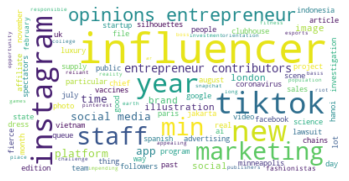

In [53]:
wordcloud = WordCloud(max_font_size=50, max_words = 100, background_color = "white").generate(words)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()